**FD002:KNN**

In [75]:
!pip install scikit-learn==1.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 30.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


### **Pre-Processing**

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

In [ ]:

with open('train_FD002.txt', 'r') as file:
    lines = file.readlines()
column_names = ['unit number', 'time, in cycles', 'operational setting 1', 'operational setting 2', 'operational setting 3','sensor measurement  1','sensor measurement  2','sensor measurement  3', 'sensor measurement  4', 'sensor measurement  5','sensor measurement  6','sensor measurement  7','sensor measurement  8','sensor measurement  9','sensor measurement  10','sensor measurement  11','sensor measurement  12','sensor measurement  13', 'sensor measurement  14', 'sensor measurement  15', 'sensor measurement  16', 'sensor measurement  17', 'sensor measurement  18', 'sensor measurement  19','sensor measurement  20', 'sensor measurement  21',]
data = []
for line in lines:
    values = line.strip().split()
    data.append(values)

df = pd.DataFrame(data, columns=column_names)
df.to_csv('train_FD002.csv', index=False)

In [53]:
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['T2','T24','T30','T50','P2','P15','P30','Nf','Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32']
col_names = index_names + setting_names + sensor_names

# read data
df_train = pd.read_csv(('train_FD003.txt'), sep=" ", header=None, names=col_names)
df_test = pd.read_csv(('test_FD003.txt'), sep=" ", header=None, names=col_names)
y_test = pd.read_csv(('RUL_FD003.txt'), sep=" ", header=None, names=['RUL'])

In [54]:
df_train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


In [5]:
# drop the sensors wiith constant values
sens_const_values = []
for feature in list(setting_names + sensor_names):
    try:
        if df_train[feature].min()==df_train[feature].max():
            sens_const_values.append(feature)
    except:
        pass

print(sens_const_values)
df_train.drop(sens_const_values,axis=1,inplace=True)
df_test.drop(sens_const_values,axis=1,inplace=True)

[]


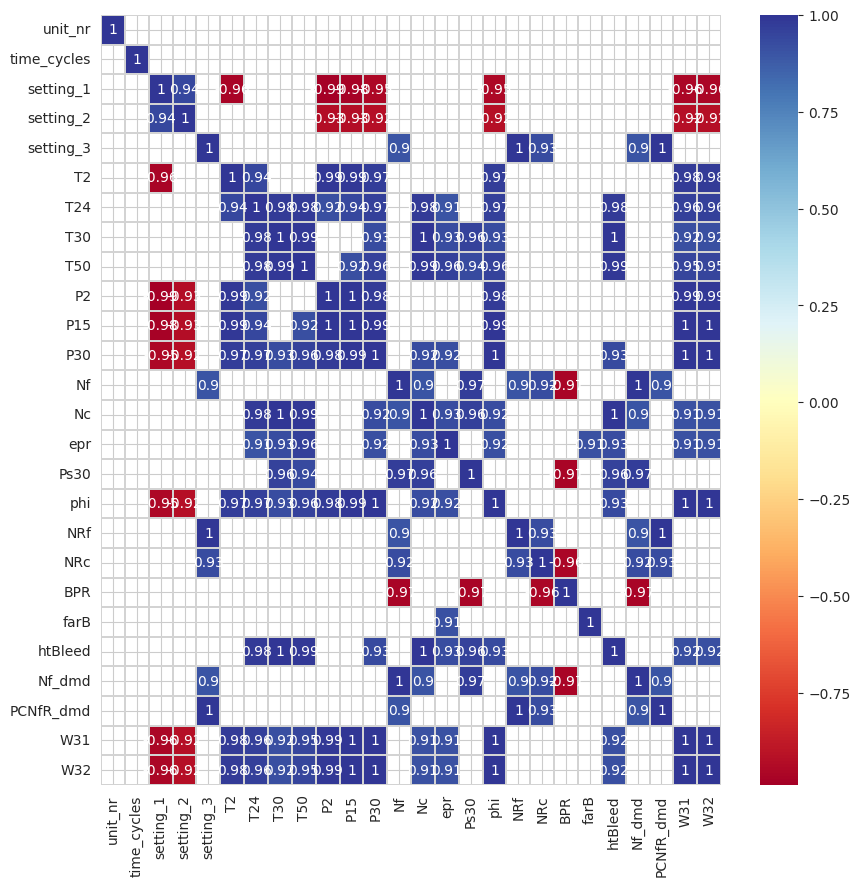

In [6]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

In [7]:
# drop one of the highly correlated features
cor_matrix = df_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.99)]
print(corr_features)

['P15', 'P30', 'Nc', 'phi', 'NRf', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']


In [8]:
features = list(df_train.columns)

In [9]:
# check for missing data
for feature in features:
    print(feature + " - " + str(len(df_train[df_train[feature].isna()])))

unit_nr - 0
time_cycles - 0
setting_1 - 0
setting_2 - 0
setting_3 - 0
T2 - 0
T24 - 0
T30 - 0
T50 - 0
P2 - 0
P15 - 0
P30 - 0
Nf - 0
Nc - 0
epr - 0
Ps30 - 0
phi - 0
NRf - 0
NRc - 0
BPR - 0
farB - 0
htBleed - 0
Nf_dmd - 0
PCNfR_dmd - 0
W31 - 0
W32 - 0


In [ ]:
df_train.dropna(axis=1, inplace=True)
df_train.dropna(axis=0, inplace=True)

In [55]:
# define the maximum life of each engine
df_train_RUL = df_train.groupby(['unit_nr']).agg({'time_cycles':'max'})
df_train_RUL.rename(columns={'time_cycles':'life'},inplace=True)
df_train_RUL.head()

,life
unit_nr,
1,259
2,253
3,222
4,272
5,213


In [56]:
df_train_RUL.rename(columns={'time_cycles':'life'},inplace=True)
df_train_RUL.head()

,life
unit_nr,
1,259
2,253
3,222
4,272
5,213


In [57]:
df_train = df_train.merge(df_train_RUL, how='left', left_on='unit_nr', right_index=True)

df_train['RUL']=df_train['life']-df_train['time_cycles']
df_train.drop(['life'],axis=1,inplace=True)

df_train['RUL'][df_train['RUL']>125]=125
df_train.head()

<ipython-input-57-24c6a572cdd2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['RUL'][df_train['RUL']>125]=125


,unit_nr,time_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,125
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,125
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,125
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,125
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,125


In [21]:
from scipy import signal
def smooth_function(x,window=15,order=3):
    return signal.savgol_filter(x,window,order)

In [22]:
Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
X = df_train.iloc[:,1:-1]
y = df_train.iloc[:,-1]
backward_regression(X, y)

worst_feature : P2, 0.8144481926031963 
worst_feature : NRf, 0.6554602996477241 
worst_feature : Nf, 0.4736374751741059 
worst_feature : epr, 0.08327952386766156 
worst_feature : NRc, 0.06502897548713699 

Selected Features:
['time_cycles', 'setting_1', 'setting_2', 'setting_3', 'T2', 'T24', 'T30', 'T50', 'P15', 'P30', 'Nc', 'Ps30', 'phi', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']


In [23]:
# X.head()
feature_names = Selected_Features[0]
np.shape(X)

(53759, 25)

In [41]:
df_train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,125
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,125
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,125
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,125
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,125


In [58]:
selected_features = ['time_cycles', 'T24', 'T30', 'T50', 'P15', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'BPR', 'htBleed', 'W31', 'W32']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [60]:
df_test_cycle = df_test.groupby(['unit_nr']).agg({'time_cycles':'max'})
df_test_cycle.rename(columns={'time_cycles':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['unit_nr'])
df_test_max = df_test_max[(df_test_max['time_cycles']==df_test_max['life'])]
df_test_max.drop(['life'],axis=1,inplace=True)

In [68]:
col_n = ["cycle"]
df_test_RUL = pd.read_csv(('RUL_FD003.txt'),  header=None, names=col_n, index_col=False)

In [62]:
df_train.iloc[:,-1]

0        125
1        125
2        125
3        125
4        125
        ... 
24715      4
24716      3
24717      2
24718      1
24719      0
Name: RUL, Length: 24720, dtype: int64

In [69]:
X_train = df_train[selected_features]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[selected_features]
y_test = df_test_RUL.iloc[:,-1]

In [70]:
y_train.value_counts()

RUL
125    12220
46       100
33       100
34       100
35       100
       ...  
88       100
89       100
90       100
91       100
0        100
Name: count, Length: 126, dtype: int64

In [71]:
X_test

,time_cycles,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,BPR,htBleed,W31,W32
232,233,642.59,1592.40,1409.87,21.58,560.53,2388.22,9085.50,47.53,528.05,2388.23,8.2966,393,39.43,23.5679
356,124,642.56,1587.42,1409.69,21.61,553.33,2388.18,9050.97,47.71,520.90,2388.17,8.4514,392,38.83,23.2821
590,234,642.75,1591.93,1417.66,21.60,563.61,2388.31,9091.69,47.68,531.36,2388.33,8.3057,395,39.27,23.6440
658,68,642.28,1584.68,1406.56,21.61,552.75,2388.07,9048.23,47.26,521.27,2388.09,8.4337,392,38.70,23.3804
796,138,642.15,1580.59,1397.26,21.58,553.82,2387.96,9050.89,47.09,521.74,2387.96,8.3900,390,38.89,23.4463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15782,358,642.89,1592.93,1409.28,21.60,560.47,2388.21,9073.16,47.60,527.72,2388.16,8.3492,392,39.33,23.5618
15877,95,642.32,1585.11,1390.01,21.61,554.60,2388.04,9052.78,47.05,522.73,2387.98,8.4064,392,38.97,23.4327
16059,182,643.35,1592.18,1426.93,21.61,552.34,2388.20,9116.53,47.83,520.87,2388.10,8.4641,396,38.60,23.2097
16348,289,642.78,1597.57,1419.47,21.59,566.57,2388.45,9105.74,48.09,534.03,2388.47,8.2459,397,39.59,23.7059


In [72]:
y_test

0      44
1      51
2      27
3     120
4     101
     ... 
95    113
96    123
97     17
98      8
99     28
Name: cycle, Length: 100, dtype: int64

### **Modeling**

In [ ]:
%%time
import time
from sklearn.neighbors import KNeighborsRegressor
start = time.time()
KNN_model = KNeighborsRegressor(n_neighbors=9).fit(X_train,y_train)
end_train = time.time()
y_predictions = KNN_model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()



model_performance.loc['kNN'] = [KNN_model.score(X_test,y_test),
                                   mean_squared_error(y_test,y_predictions,squared=False),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(KNN_model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False)))

R-squared error: 67.33%
Root Mean Squared Error: 30.74
CPU times: user 175 ms, sys: 7.7 ms, total: 183 ms
Wall time: 182 ms


<ipython-input-85-c5ec9625e481>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)
<ipython-input-85-c5ec9625e481>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


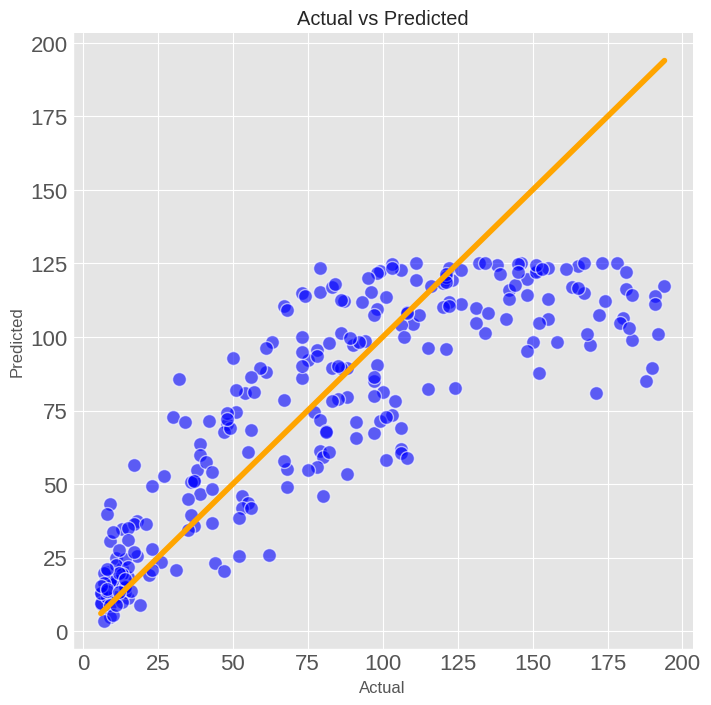

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'sans-serif'
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                    y=y_predictions,
                    s=100,
                    alpha=0.6,
                    linewidth=1,
                    color='blue',
                    ax=ax)
f = sns.lineplot(x=[min(y_test), max(y_test)],
                 y=[min(y_test), max(y_test)],
                 linewidth=4,
                 color='orange',
                 ax=ax)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()


<ipython-input-90-b4f4b4f68dfc>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


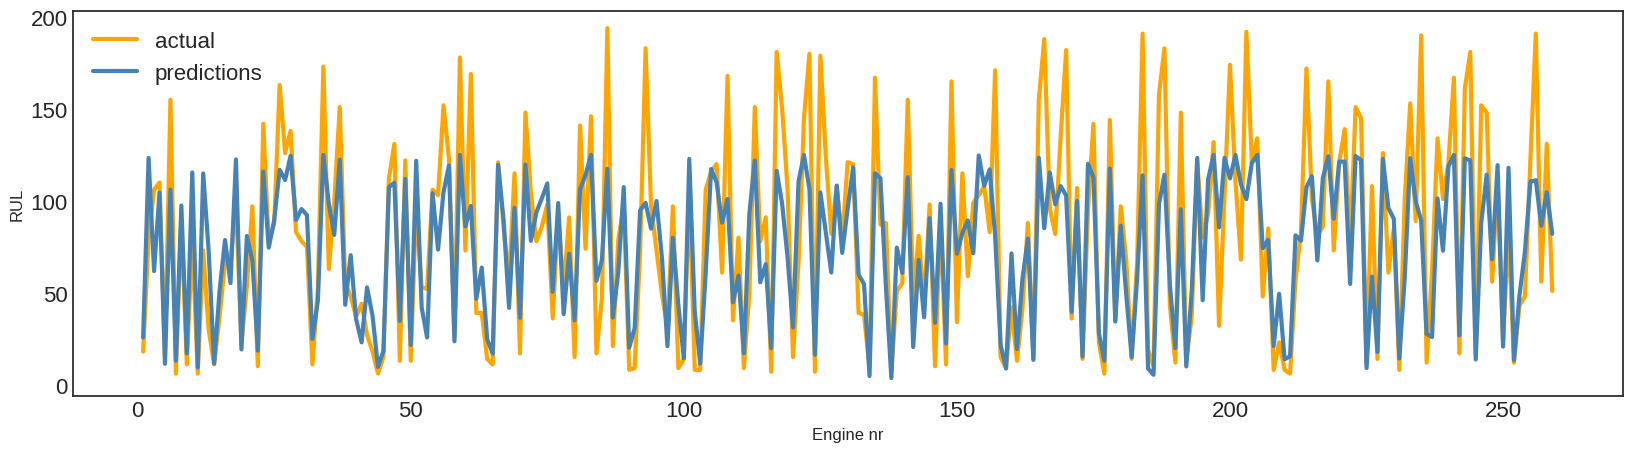

In [ ]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=20,5

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(1,len(df_train['engine'].unique())),
                y=y_test,
                color='orange',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(1,len(df_train['engine'].unique())),
                y=y_predictions,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

In [ ]:
KNN_model.save_model('knn.h5')

AttributeError: 'KNeighborsRegressor' object has no attribute 'save_model'

In [ ]:
new_knn = KNeighborsRegressor()
new_knn.load_model('knn.h5')

In [ ]:
model_performance.style.background_gradient(cmap='RdYlBu_r').format({
    'R2': '{:.2%}',
    'RMSE': '{:.2f}',
    'time to train': '{:.2f}',
    'time to predict': '{:.2f}',
    'total time': '{:.2f}'
})

,R2,RMSE,time to train,time to predict,total time
kNN,67.33%,30.74,0.14,0.01,0.16


In [48]:
X_train

,time_cycles,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,BPR,htBleed,W31,W32
0,1,555.32,1358.61,1137.23,8.00,194.64,2222.65,8341.91,42.02,183.06,2387.72,9.3461,334,14.73,8.8071
1,2,549.90,1353.22,1125.78,5.71,138.51,2211.57,8303.96,42.20,130.42,2387.66,9.3774,330,10.41,6.2665
2,3,537.31,1256.76,1047.45,9.02,175.71,1915.11,8001.42,36.69,164.22,2028.03,10.8941,309,14.08,8.6723
3,4,549.51,1354.03,1126.38,5.71,138.46,2211.58,8303.96,41.96,130.72,2387.61,9.3528,329,10.59,6.4701
4,5,537.07,1257.71,1047.93,9.03,175.05,1915.10,7993.23,36.89,164.31,2028.00,10.8963,309,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,312,608.79,1495.60,1269.51,13.66,334.00,2324.92,8852.27,44.72,314.05,2389.02,9.3035,369,24.36,14.5189
53755,313,605.81,1514.32,1324.12,15.50,392.46,2319.17,8915.86,46.08,371.22,2388.42,8.7586,374,28.10,16.9454
53756,314,537.48,1276.24,1057.92,9.04,175.11,1917.37,8114.33,37.14,163.74,2030.33,11.0657,310,14.19,8.5503
53757,315,537.84,1272.95,1066.30,9.04,174.81,1917.36,8112.63,37.32,164.37,2030.35,11.0537,311,14.05,8.3729


In [73]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import time

start = time.time()

XGBoost_model = XGBRegressor(n_estimators=500,
                     learning_rate=0.1,
                     max_depth=3,
                     min_child_weight=1,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     n_jobs=-1)

XGBoost_model.fit(X_train, y_train)

end_train = time.time()

y_predictions_XG = XGBoost_model.predict(X_test)
end_predict = time.time()

model_performance.loc['XGBoost'] = [XGBoost_model.score(X_test, y_test),
                                     mean_squared_error(y_test, y_predictions_XG, squared=False),
                                     end_train - start,
                                     end_predict - end_train,
                                     end_predict - start]

print('R-squared error: ' + "{:.2%}".format(XGBoost_model.score(X_test, y_test)))
print('Root Mean Squared Error: ' + "{:.2f}".format(mean_squared_error(y_test, y_predictions_XG, squared=False)))

R-squared error: 82.25%
Root Mean Squared Error: 17.44


In [74]:
XGBoost_model.save_model('xgb-fd003.h5')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:49:24] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
